In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp=spacy.load('en_core_web_lg')
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.corpus import stopwords
import os
import ntpath
ntpath.basename("a/b/c")

In [31]:
#Create list for files
files = []

#Loop through directory to generate file names
directory = r'C:\Users\saman\Documents\NU_Data_Science_Bootcamp\RDShipWars\data'
for entry in os.scandir(directory):
    if (entry.path.endswith(".csv")):
        files.append(entry.path)

In [32]:
#Function to split basename from path
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

#Write basename to new list
files_2=[path_leaf(path) for path in files]

<ipython-input-37-2c1a5221028d>:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


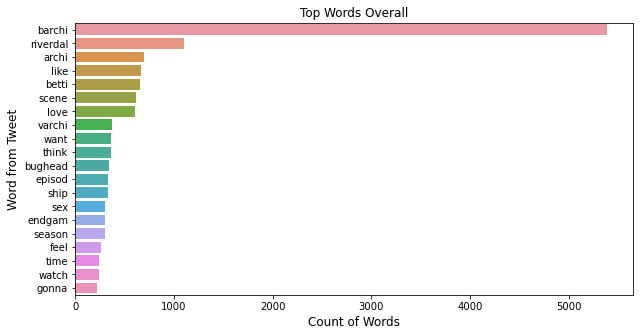

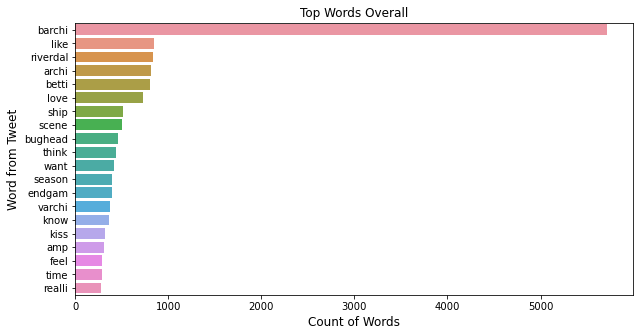

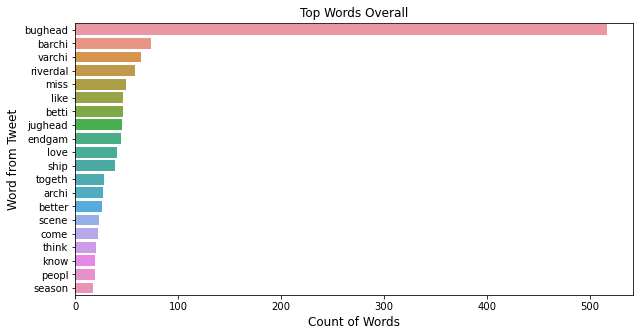

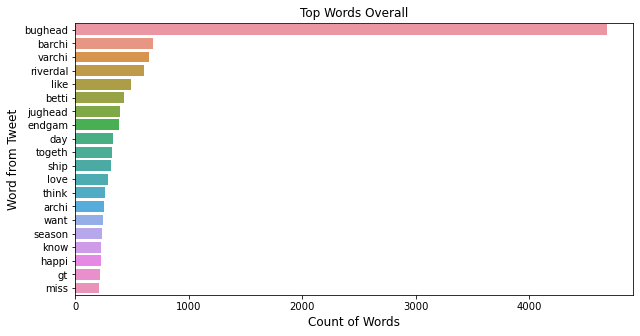

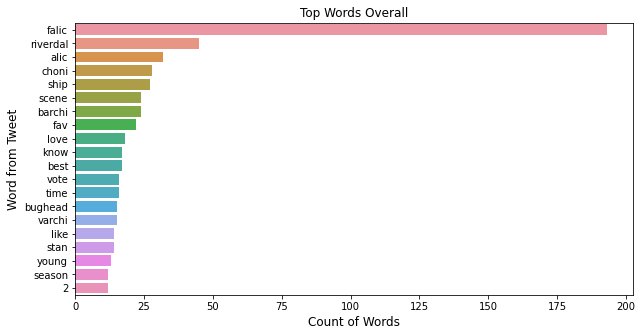

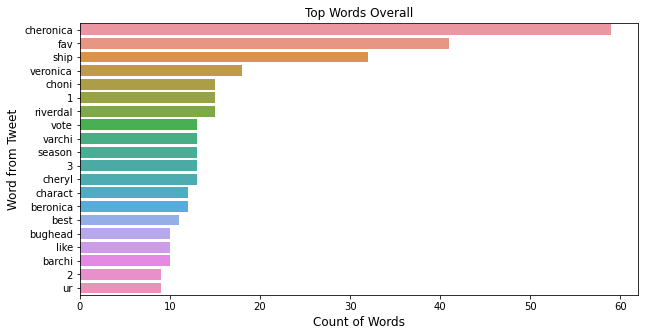

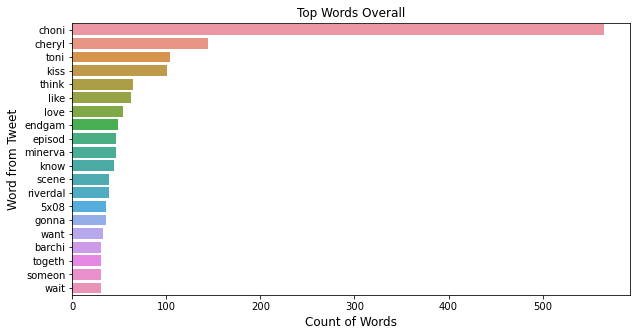

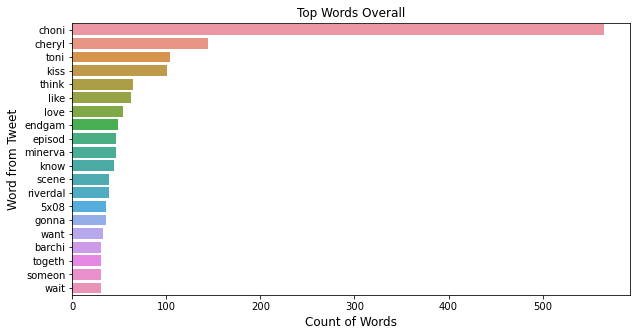

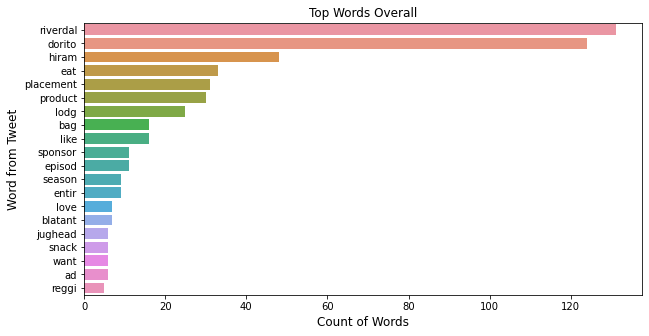

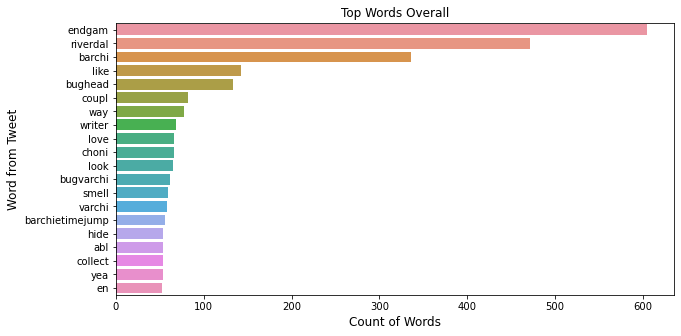

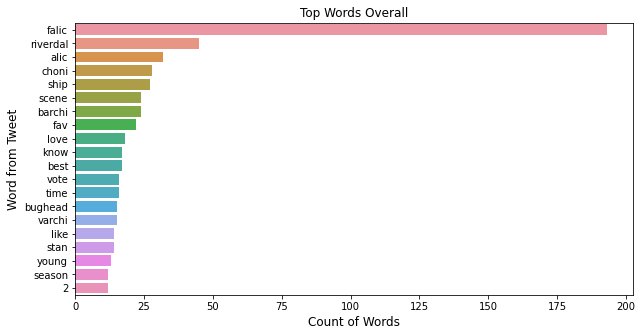

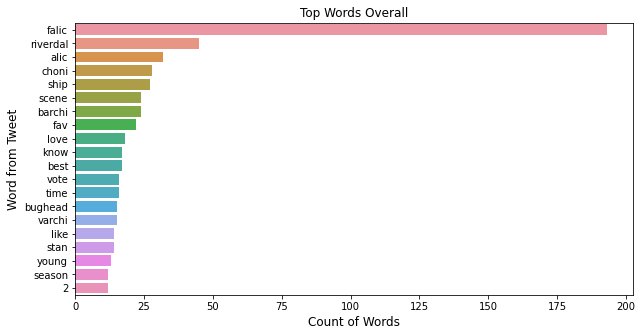

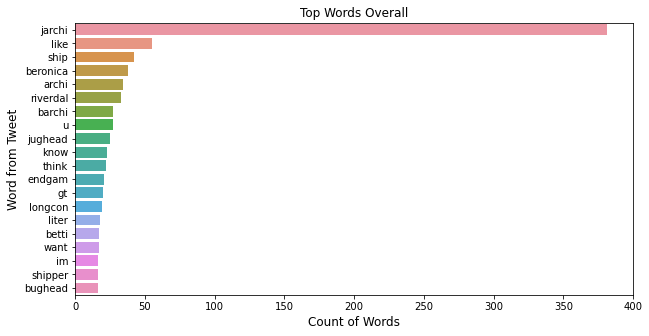

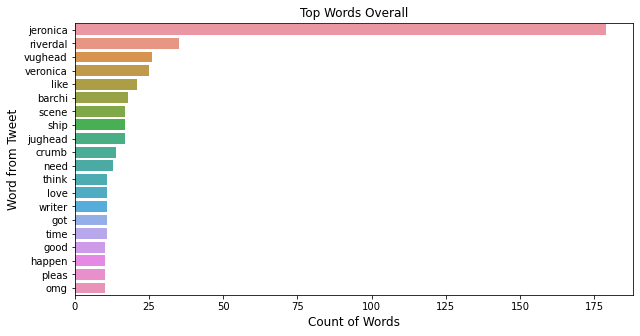

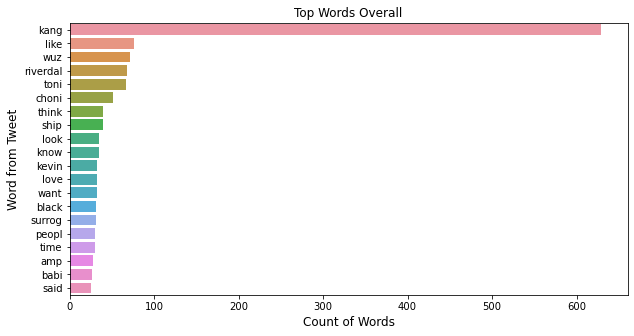

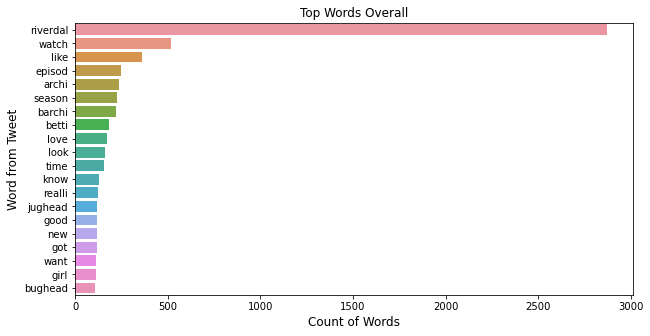

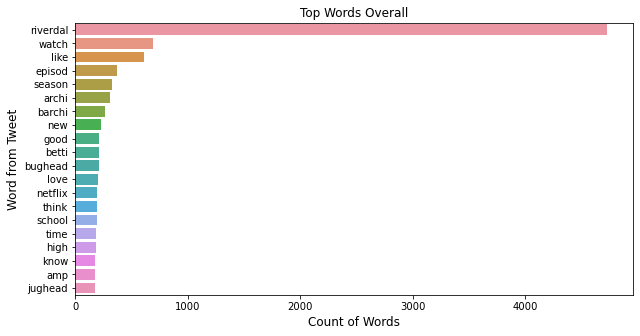

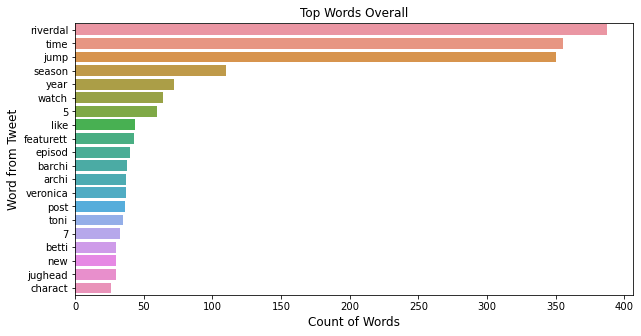

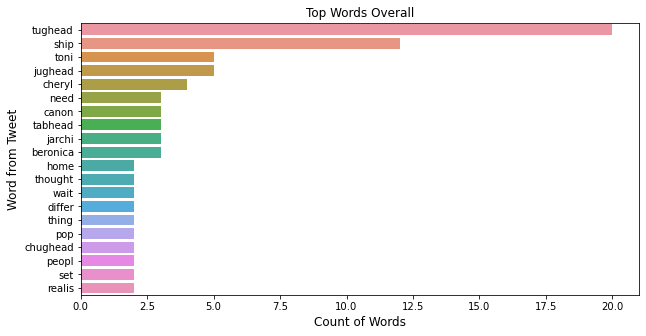

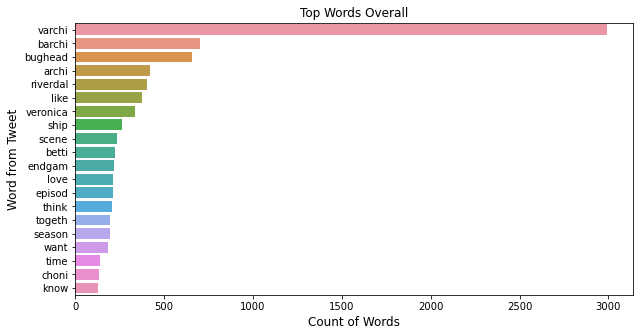

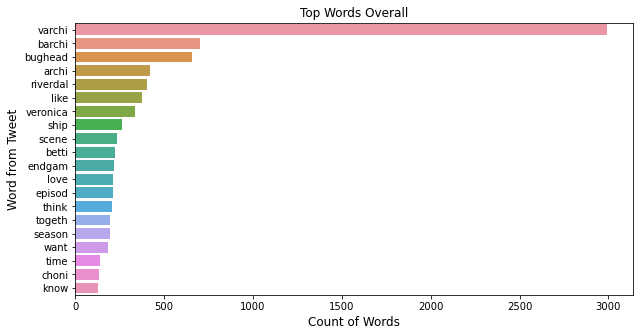

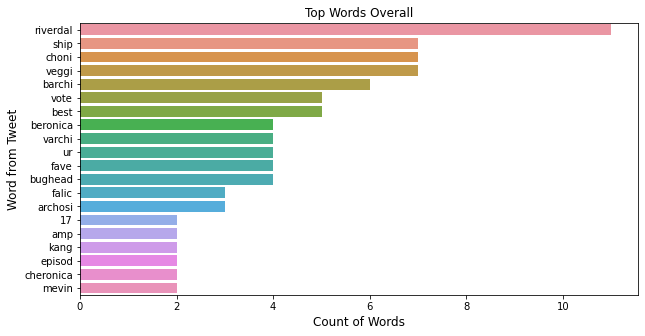

In [37]:
#Iterate through csv files
for file in files_2:
    
    #read in csv as data frame
    df=pd.read_csv(f'data/{file}')
    
    #Add words to stopwords
    additional  = ['rt','rts','retweet']
    swords = set().union(stopwords.words('english'),additional)

    #tokenize & remove stopwords
    df['processed_text'] = df['tweets'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

    #Create list with joined words
    text2 = []

    for line in df['processed_text']:
        text2.append((" ").join(line))
    
    #Add cleaned list as column to data frame
    df['cleaned_tweets']=text2

    #write sentences from tweets into list
    list_of_sentences = [sentence for sentence in df.cleaned_tweets]

    #create set of words from all tweets
    lines = []
    for sentence in list_of_sentences:
        words = sentence.split()
        for w in words:
            lines.append(w)
        
    lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

    lines2 = []

    for word in lines:
        if word != '':
            lines2.append(word)
        
    #Use snowball stemmer to reduce words to their stems
    s_stemmer = SnowballStemmer(language='english')

    stem = []
    for word in lines2:
        stem.append(s_stemmer.stem(word))
    
    #Remove stop words from stem list
    stem2= []

    for word in stem:
        if word not in nlp.Defaults.stop_words:
            stem2.append(word)

    df2 = pd.DataFrame(stem2)

    df2 = df2[0].value_counts()

    #save dataframe as csv
    df.to_csv(f'{file}.csv', index=False)
    
    #Create fig
    df2 = df2[:20,]
    plt.figure(figsize=(10,5))
    sns.barplot(df2.values,df2.index, alpha=1)
    plt.title('Top Words Overall')
    plt.ylabel('Word from Tweet', fontsize=12)
    plt.xlabel('Count of Words', fontsize=12)
    plt.savefig(f'{file}.png')